## NAME: ORHORHAMRERU MORONKE RACHAEL
## PYTHON INCUBATOR CLASS
### PRESENTING ON COUNTRY DATASET
### 28TH NOVEMBER 2022

## INTRODUCTION

**Country information/Data Set tends to be An analysis; country reports are descriptive reports covering most areas of interest on a country. They contain an analysis of the business environment and include information on political, environmental, social, technological and risk factors. 
Datasets – raw data, e.g. GDP, inflation figures, etc..**

## BACKGROUND

**This dataset offers a variety of indicators which allows for profound assessments of a target country. In this analysis, the country dataset includes the economic data and social data as an indicator for economics growth**

In [ ]:
## AIMS

In [ ]:
## OBJECTIVES

## RESEARCH QUESTIONS
1. What effect does Wealth index(Income) has on Child Mortality and GDP

2. What is the average life expectancy of countries by region

3. What are the top 10 and least 10 countries of  net exporter

4. What are the top 10 countries by income and GDP

5. What is the relatinship between child mortality rate and fertility rate base on wealth index of countries


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
country = pd.read_csv('C:\\Users\\HP\Desktop\\country_data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Inaccurate spelling of 9 country name
#### Define

* Congo, Dem. Rep.
* Congo, Rep.
* Cote d'Ivoire
* Kyrgyz Republic
* Lao
* Macedonia, FYR
* Micronesia, Fed. Sts.
* Slovak Republic
* St. Vincent and the Grenadines

#### Clean
* DR Congo
* Republic of the Congo
* Ivory Coast
* Kyrgyzstan
* Laos
* North Macedonia
* Micronesia
* Slovakia
* Saint Vincent and the Grenadines

### Code

In [5]:
country['country'].replace('Congo, Dem. Rep.','DR Congo', inplace = True)
country['country'].replace('Congo, Rep.','Republic of the Congo', inplace = True)
country['country'].replace("Cote d'Ivoire",'Ivory Coast', inplace = True)
country['country'].replace('Kyrgyz Republic','Kyrgyzstan', inplace = True)
country['country'].replace('Lao','Laos', inplace = True)
country['country'].replace('Macedonia, FYR','North Macedonia', inplace = True)
country['country'].replace('Micronesia, Fed. Sts.','Micronesia', inplace = True)
country['country'].replace('Slovak Republic','Slovakia', inplace = True)
country['country'].replace('St. Vincent and the Grenadines','Saint Vincent and the Grenadines', inplace = True)

In [6]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
country['Net_Export'] = country.apply(lambda row: row.exports - row.imports, axis =1)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Net_Export
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-34.9
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-20.6
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,7.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,19.4
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-13.4


### Wealth Index

In [8]:
def income_class(x):
    if x < 1045:
        return "Low income"
    if 1045 <= x < 4095:
        return "Lower-middle income"
    elif 4096 <= x < 12695:
        return "Upper-middle income"
    elif x > 12695:
        return "High income"
country['wealth_index'] = country['income'].map(income_class)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Net_Export,wealth_index
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-34.9,Lower-middle income
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-20.6,Upper-middle income
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,7.0,High income
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,19.4,Upper-middle income
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-13.4,High income


### To calculate Child Mortality

$$
Child MR = \frac{(child_mort)}{(1000)} * 100
$$

In [9]:
country['Child_Mortality'] = country.apply(lambda row: ((row.child_mort)/1000) * 100, axis =1)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Net_Export,wealth_index,Child_Mortality
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-34.9,Lower-middle income,9.02
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-20.6,Upper-middle income,1.66
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,7.0,High income,2.73
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,19.4,Upper-middle income,11.90
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-13.4,High income,1.03


### Region

In [10]:
Region = pd.read_csv('C:\\Users\\HP\Downloads\\csvData.csv')
Region.head()

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa


In [11]:
df = pd.merge(country,Region, on ="country", how='left')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Net_Export,wealth_index,Child_Mortality,continent
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-34.9,Lower-middle income,9.02,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-20.6,Upper-middle income,1.66,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,7.0,High income,2.73,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,19.4,Upper-middle income,11.90,Africa
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-13.4,High income,1.03,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-6.1,Lower-middle income,2.92,Oceania
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,10.9,High income,1.71,South America
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,-8.2,Upper-middle income,2.33,Asia
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-4.4,Upper-middle income,5.63,Asia


In [12]:
df_columns = ['country', 'continent', 'wealth_index','Child_Mortality','income','life_expec','total_fer','gdpp','Net_Export']

In [13]:
df = df[df_columns].copy()

In [14]:
data = df.rename(columns={'country':'Country', 'continent':'Region', 'wealth_index':'Wealth_Index',
                 'income':'Income', 'life_expec':'Life_Expectancy', 'total_fer':'Total_Fertilty', 'gdpp':'GDP'})
data.head()

,Country,Region,Wealth_Index,Child_Mortality,Income,Life_Expectancy,Total_Fertilty,GDP,Net_Export
0,Afghanistan,Asia,Lower-middle income,9.02,1610,56.2,5.82,553,-34.9
1,Albania,Europe,Upper-middle income,1.66,9930,76.3,1.65,4090,-20.6
2,Algeria,Africa,High income,2.73,12900,76.5,2.89,4460,7.0
3,Angola,Africa,Upper-middle income,11.90,5900,60.1,6.16,3530,19.4
4,Antigua and Barbuda,North America,High income,1.03,19100,76.8,2.13,12200,-13.4


In [15]:
data.isnull().sum()

Country            0
Region             0
Wealth_Index       0
Child_Mortality    0
Income             0
Life_Expectancy    0
Total_Fertilty     0
GDP                0
Net_Export         0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          167 non-null    object 
 1   Region           167 non-null    object 
 2   Wealth_Index     167 non-null    object 
 3   Child_Mortality  167 non-null    float64
 4   Income           167 non-null    int64  
 5   Life_Expectancy  167 non-null    float64
 6   Total_Fertilty   167 non-null    float64
 7   GDP              167 non-null    int64  
 8   Net_Export       167 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 13.0+ KB


# Analysis

In [41]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = '#89CFF0'

## WHAT EFFECT DOES WEALTH INDEX HAS ON CHILD MORTALITY AND GDP

Text(0, 0.5, 'Child Mortality')

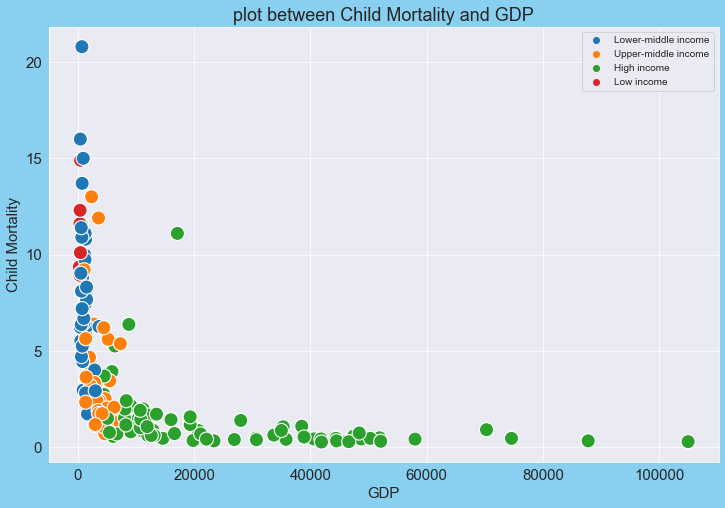

In [40]:
# plot between child mortality and GDP

plt.rcParams['figure.figsize'] = (12, 8)
plt.title('plot between Child Mortality and GDP')
sns.scatterplot(x= data.GDP, y =data.Child_Mortality, hue =data.Wealth_Index, s = 200);

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('GDP')
plt.ylabel('Child Mortality')

## AVERAGE LIFE EXPECTANCY BY REGION

### What is Life Expectancy?
**The term “life expectancy” refers to the number of years a person can expect to live. By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die**

In [45]:
Avg_life = data.groupby('Region')['Life_Expectancy'].mean()
pd.DataFrame(Avg_life)

,Life_Expectancy
Region,
Africa,61.504255
Asia,72.486364
Europe,77.557500
North America,72.440000
Oceania,68.933333
South America,74.450000


## WHAT IS THE AVERAGE INCOME OF COUNTRIES BY REGION

## What is National Income
**the aggregate of earnings from a nation's current production including compensation of employees, interest, rental income, and profits of business after taxes**

In [19]:
data_region = data.groupby('Region')['Income'].mean()
data_region

Region
Africa            5627.510638
Asia             20629.545455
Europe           30029.500000
North America    15960.666667
Oceania          11247.777778
South America    12429.166667
Name: Income, dtype: float64

Text(0, 0.5, '')

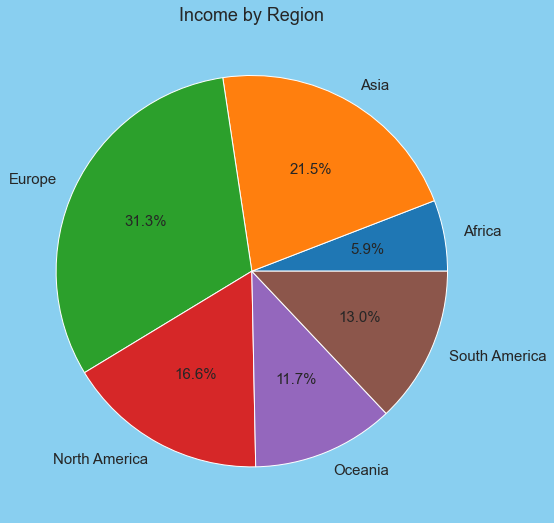

In [20]:
data_region.plot.pie(autopct ='%1.1f%%')
plt.title('Income by Region')
plt.ylabel("");

### Total Number of Countries in Each Region

In [21]:
# Total country

total_country = data.groupby('Region')[('Country')].count()
pd.DataFrame(total_country)

,Country
Region,
Africa,47
Asia,44
Europe,40
North America,15
Oceania,9
South America,12


## WHAT ARE THE TOP AND LEAST 10 COUNTRIES IN NET EXPORT

### What Are Net Exports?
**Net exports are a measure of a nation's total trade. The formula for net exports is: The value of a nation's total export goods and services minus the value of all the goods and services it imports equal its net exports.**

**A nation that has positive net exports enjoys a trade surplus, while negative net exports mean the nation has a trade deficit**

In [22]:
top_country = data.nlargest(10,['Net_Export'])
top_country

,Country,Region,Wealth_Index,Child_Mortality,Income,Life_Expectancy,Total_Fertilty,GDP,Net_Export
23,Brunei,Asia,High income,1.05,80600,77.1,1.84,35300,39.4
55,Gabon,Africa,High income,6.37,15400,62.9,4.08,8750,38.8
123,Qatar,Asia,High income,0.90,125000,79.5,2.07,70300,38.5
82,Kuwait,Asia,High income,1.08,75200,78.2,2.21,38500,36.3
9,Azerbaijan,Asia,High income,3.92,16000,69.1,1.92,5840,33.6
91,Luxembourg,Europe,High income,0.28,91700,81.3,1.63,105000,33.0
154,Turkmenistan,Asia,Upper-middle income,6.20,9940,67.9,2.83,4440,31.8
38,Republic of the Congo,Africa,Upper-middle income,6.39,5190,60.4,4.95,2740,30.4
49,Equatorial Guinea,Africa,High income,11.10,33700,60.9,5.21,17100,26.9
133,Singapore,Asia,High income,0.28,72100,82.7,1.15,46600,26.0


In [23]:
least_country =  data.nsmallest(10,['Net_Export'])
least_country

,Country,Region,Wealth_Index,Child_Mortality,Income,Life_Expectancy,Total_Fertilty,GDP,Net_Export
88,Liberia,Africa,Low income,8.93,700,60.8,5.02,327,-73.5
81,Kiribati,Oceania,Lower-middle income,6.27,1730,60.7,3.84,1490,-66.6
87,Lesotho,Africa,Lower-middle income,9.97,2380,46.5,3.30,1170,-61.6
101,Micronesia,Oceania,Lower-middle income,4.00,3340,65.4,3.46,2860,-57.5
66,Haiti,North America,Lower-middle income,20.80,1500,32.1,3.33,662,-49.4
151,Tonga,Oceania,Upper-middle income,1.74,4980,69.9,3.91,3550,-47.9
146,Tajikistan,Asia,Lower-middle income,5.24,2110,69.6,3.51,738,-43.7
102,Moldova,Europe,Lower-middle income,1.72,3910,69.7,1.27,1630,-39.3
36,Comoros,Africa,Lower-middle income,8.82,1410,65.9,4.75,769,-35.2
0,Afghanistan,Asia,Lower-middle income,9.02,1610,56.2,5.82,553,-34.9


<ipython-input-29-d5fa8b080484>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha = 'right')
<ipython-input-29-d5fa8b080484>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha = 'right')


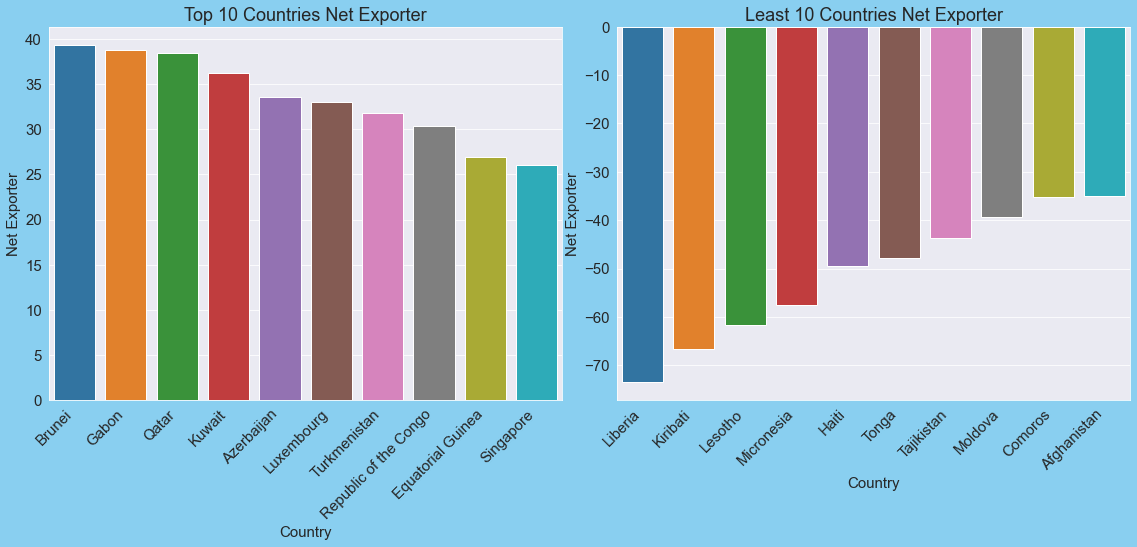

In [29]:
fig,axes = plt.subplots(1,2, figsize=(16,6))
plt.tight_layout()
xlabels = top_country.Country
axes[0].set_title("Top 10 Countries Net Exporter")
axes[0].set_xticklabels(xlabels, rotation=45, ha = 'right')
sns.barplot(x=top_country.Country, y = top_country.Net_Export, ax=axes[0])
axes[0].set_ylabel('Country Name')
axes[0].set_ylabel('Net Exporter')

xlabels = least_country.Country
axes[1].set_title("Least 10 Countries Net Exporter")
axes[1].set_xticklabels(xlabels, rotation=45, ha = 'right')
sns.barplot(x=least_country.Country, y = least_country.Net_Export, ax=axes[1])
axes[1].set_ylabel('Country Name')
axes[1].set_ylabel('Net Exporter');

## WHAT ARE THE TOP 10 COUNTRIES BY INCOME AND GDP

In [26]:
top_income= data.nlargest(10,['Income'])
top_income

,Country,Region,Wealth_Index,Child_Mortality,Income,Life_Expectancy,Total_Fertilty,GDP,Net_Export
123,Qatar,Asia,High income,0.90,125000,79.5,2.07,70300,38.5
91,Luxembourg,Europe,High income,0.28,91700,81.3,1.63,105000,33.0
23,Brunei,Asia,High income,1.05,80600,77.1,1.84,35300,39.4
82,Kuwait,Asia,High income,1.08,75200,78.2,2.21,38500,36.3
133,Singapore,Asia,High income,0.28,72100,82.7,1.15,46600,26.0
114,Norway,Europe,High income,0.32,62300,81.0,1.95,87800,11.2
157,United Arab Emirates,Asia,High income,0.86,57600,76.5,1.87,35000,14.1
145,Switzerland,Europe,High income,0.45,55500,82.2,1.52,74600,10.7
159,United States,North America,High income,0.73,49400,78.7,1.93,48400,-3.4
73,Ireland,Europe,High income,0.42,45700,80.4,2.05,48700,16.5


In [27]:
top_gdp = data.nlargest(10,['GDP'])
top_gdp

,Country,Region,Wealth_Index,Child_Mortality,Income,Life_Expectancy,Total_Fertilty,GDP,Net_Export
91,Luxembourg,Europe,High income,0.28,91700,81.3,1.63,105000,33.0
114,Norway,Europe,High income,0.32,62300,81.0,1.95,87800,11.2
145,Switzerland,Europe,High income,0.45,55500,82.2,1.52,74600,10.7
123,Qatar,Asia,High income,0.90,125000,79.5,2.07,70300,38.5
44,Denmark,Europe,High income,0.41,44000,79.5,1.87,58000,6.9
144,Sweden,Europe,High income,0.30,42900,81.5,1.98,52100,5.5
7,Australia,Oceania,High income,0.48,41400,82.0,1.93,51900,-1.1
110,Netherlands,Europe,High income,0.45,45500,80.7,1.79,50300,8.4
73,Ireland,Europe,High income,0.42,45700,80.4,2.05,48700,16.5
159,United States,North America,High income,0.73,49400,78.7,1.93,48400,-3.4


<ipython-input-30-a49c559306ec>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha = 'right')
<ipython-input-30-a49c559306ec>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha = 'right')


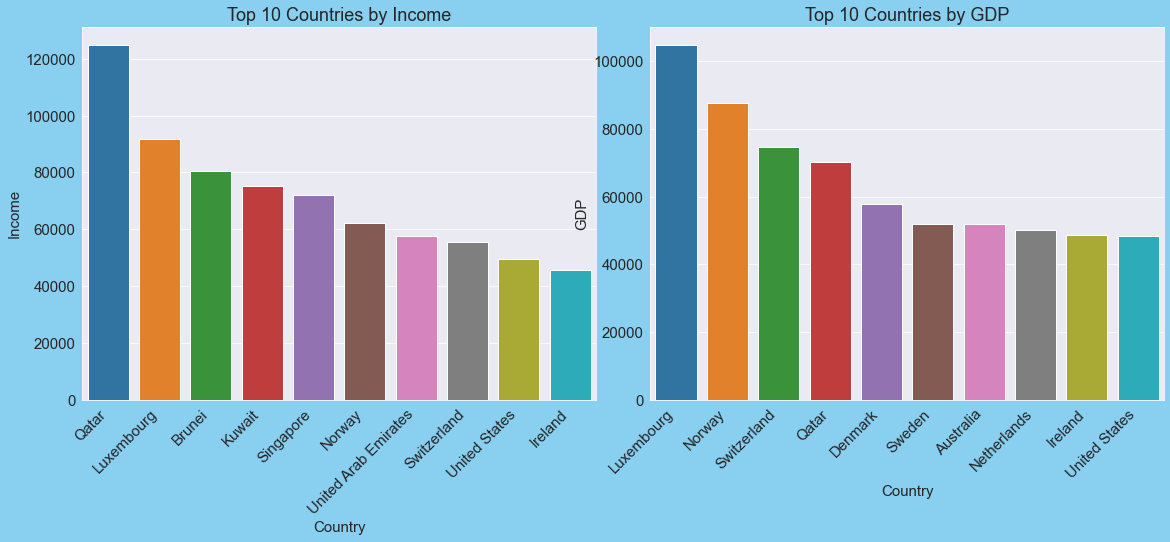

In [30]:
fig,axes = plt.subplots(1,2, figsize=(16,6))
plt.tight_layout()
xlabels = top_income.Country
axes[0].set_title("Top 10 Countries by Income")
axes[0].set_xticklabels(xlabels, rotation=45, ha = 'right')
sns.barplot(x=top_income.Country, y = top_income.Income, ax=axes[0])
axes[0].set_ylabel('Country Name')
axes[0].set_ylabel('Income')

xlabels = top_gdp.Country
axes[1].set_title("Top 10 Countries by GDP")
axes[1].set_xticklabels(xlabels, rotation=45, ha = 'right')
sns.barplot(x=top_gdp.Country, y = top_gdp.GDP, ax=axes[1])
axes[1].set_ylabel('Country Name')
axes[1].set_ylabel('GDP');

## WHAT IS THE RELATIONSHIP BETWEEN CHILD MORTALITY AND FERTILITY RATE BASE ON WEALTH INDEX

#### What is Child Mortality Rate? 
**Child mortality or the under-five mortality rate refers to the probability of a child dying between birth and exactly 5 years of age, expressed per 1,000 live births**

#### What is Fertility Rate?
**The fertility rate at a given age is the number of children born alive to women of that age during the year as a proportion of the average annual population of women of the same age**

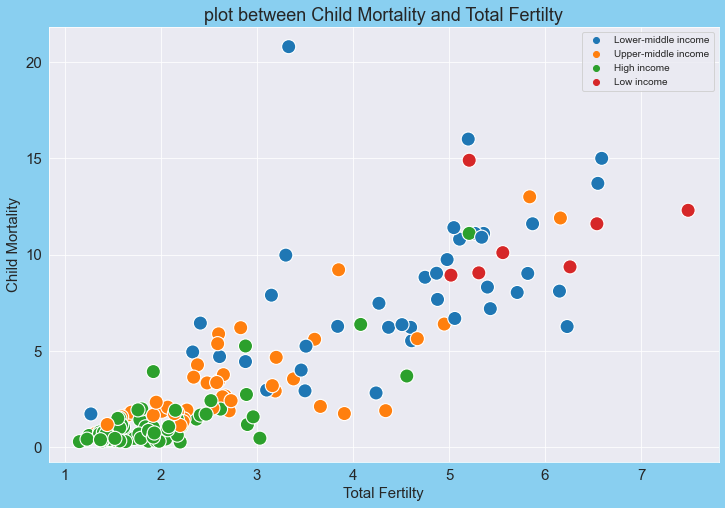

In [38]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('plot between Child Mortality and Total Fertilty')
sns.scatterplot(x= data.Total_Fertilty, y =data.Child_Mortality, hue =data.Wealth_Index, s = 200);

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('Total Fertilty')
plt.ylabel('Child Mortality');

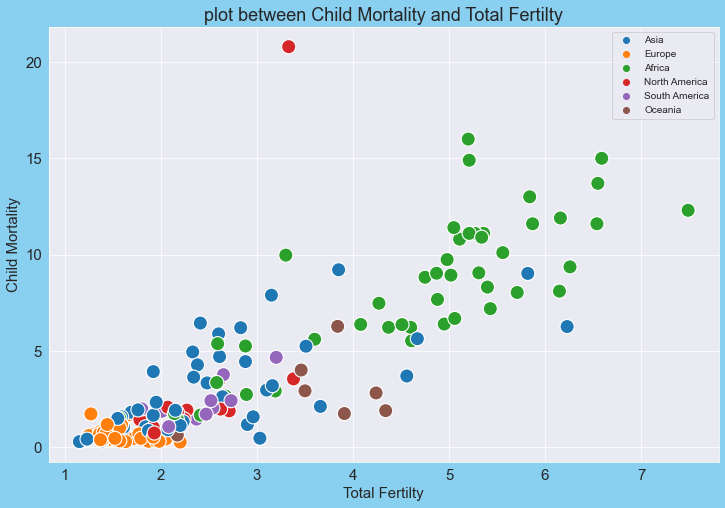

In [39]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('plot between Child Mortality and Total Fertilty')
sns.scatterplot(x= data.Total_Fertilty, y =data.Child_Mortality, hue =data.Region, s = 200);

plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('Total Fertilty')
plt.ylabel('Child Mortality');

## CONCLUSION
**